In [4]:
import os
import time
import pandas
import matplotlib.pyplot as plt

#grab all the raw lines
log_folder = r"logs"
lines = []
for log_file in os.listdir(log_folder):
    file_path = os.path.join(log_folder, log_file)
    with open(file_path, "r") as f:
        lines.extend(f.readlines())
lines = [l for l in lines if l != "" and l != "\n"]

#filter for lines that fit the format
good_lines = []
for line in lines:
    #split by spaces
    parts = line.split(' ')

    #should be at least 2 parts
    if len(parts) < 2:
        print(f'Parts are less than 2: {parts}')
        continue

    #first part must be a float
    try:
        float(parts[0])
    except:
        continue

    #parse the good line
    line = line.replace('\n','')

    good_lines.append(line)

lines = good_lines



#sort by the first part when split by spaces
lines = sorted(lines, key=lambda x: float(x.split(' ')[0]))

In [5]:
columns = [
    "timestamp",
    "post_rate_limits",
    "post_successfuls",
    "images",
    "featured_scrape_successfuls",
    "featured_scrape_rate_limits",
    "collective_scrape_successfuls",
    "collective_scrape_rate_limits",
]

# Initialize the data list for rows
data = []

current_data_dict = {
    "post_rate_limit": 0,
    "post_successful": 0,
    "images": 0,
    "featured_scrape_successful": 0,
    "featured_scrape_rate_limit": 0,
    "collective_scrape_successful": 0,
    "collective_scrape_rate_limit": 0,
}

first_timestamp = None
for line in lines:
    # Skip empty lines
    line = line.lower()
    if line == "":
        continue

    # Update counters based on log line content
    for key in current_data_dict.keys():
        if "image_count" in line:
            current_data_dict["images"] = int(line.split(" ")[-1])
            continue

        if key in line:
            current_data_dict[key] += 1

    # Add the current state of the dictionary to the data list
    data.append(
        {
            "timestamp": float(line.split(' ')[0]),
            "post_rate_limits": current_data_dict["post_rate_limit"],
            "post_successfuls": current_data_dict["post_successful"],
            "images": current_data_dict["images"],
            "featured_scrape_successfuls": current_data_dict[
                "featured_scrape_successful"
            ],
            "featured_scrape_rate_limits": current_data_dict[
                "featured_scrape_rate_limit"
            ],

            "collective_scrape_successfuls": current_data_dict[
                "collective_scrape_successful"
            ],
            "collective_scrape_rate_limits": current_data_dict[
                "collective_scrape_rate_limit"
            ],
        }
    )

# Create a DataFrame from the collected data
df = pandas.DataFrame(data, columns=columns)


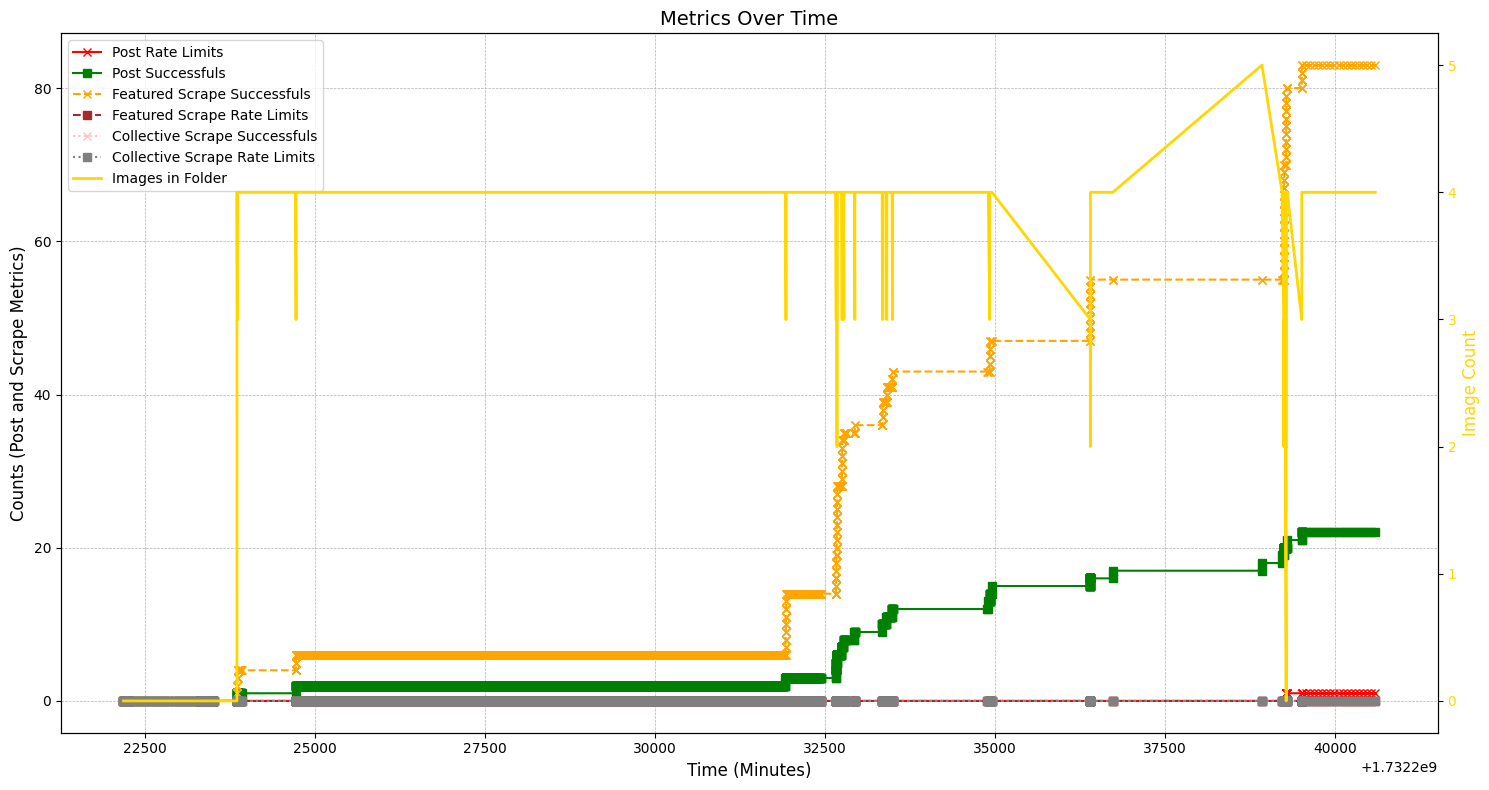

In [6]:
# Create a single plot with all metrics
fig, ax1 = plt.subplots(figsize=(15, 8))


ax1.plot(
    df["timestamp"],
    df["post_rate_limits"],
    label="Post Rate Limits",
    marker="x",
    color="red",
)
ax1.plot(
    df["timestamp"],
    df["post_successfuls"],
    label="Post Successfuls",
    marker="s",
    color="green",
)

# Add scraping metrics to the same axis
ax1.plot(
    df["timestamp"],
    df["featured_scrape_successfuls"],
    label="Featured Scrape Successfuls",
    linestyle="--",
    marker="x",
    color="orange",
)
ax1.plot(
    df["timestamp"],
    df["featured_scrape_rate_limits"],
    label="Featured Scrape Rate Limits",
    linestyle="--",
    marker="s",
    color="brown",
)

ax1.plot(
    df["timestamp"],
    df["collective_scrape_successfuls"],
    label="Collective Scrape Successfuls",
    linestyle=":",
    marker="x",
    color="pink",
)
ax1.plot(
    df["timestamp"],
    df["collective_scrape_rate_limits"],
    label="Collective Scrape Rate Limits",
    linestyle=":",
    marker="s",
    color="gray",
)

# Plot images on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(
    df["timestamp"], df["images"], label="Images in Folder", color="gold", linewidth=2
)

# Customize axes
ax1.set_xlabel("Time (Minutes)", fontsize=12)
ax1.set_ylabel("Counts (Post and Scrape Metrics)", fontsize=12)
ax2.set_ylabel("Image Count", fontsize=12, color="gold")
ax2.tick_params(axis="y", labelcolor="gold")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=10)

# Add grid and title
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title("Metrics Over Time", fontsize=14)

# Save and show the plot
plt.tight_layout()
plt.show()